<a href="https://colab.research.google.com/github/Icemagic33/pytorch1/blob/main/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N) # true slope is 0.5 and true y-intercept is -1

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use our MSE loss

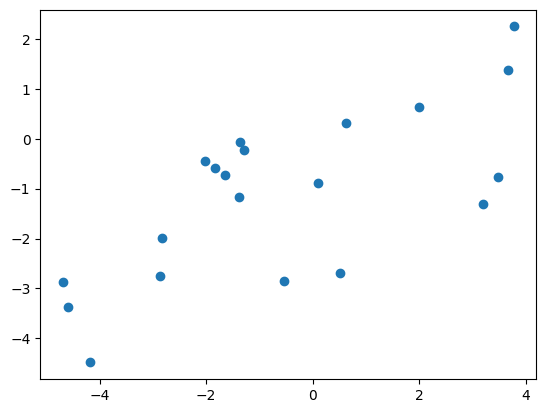

In [3]:
# Plot the data
plt.scatter(X, Y);

In [4]:
# Create the linear regression model
model = nn.Linear(1,1)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
# In ML we want our data to be of shape: (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
type(inputs)

torch.Tensor

In [9]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad() 
  # we do this step because PyTorch is accumulating the gradients each time 
  # you call backward. So, this will zero the gradient to prevent them from 
  # accumulating and give us the correct answer

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step() # one step of gradient descent

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}') 

Epoch 1/30, Loss: 9.3615
Epoch 2/30, Loss: 3.4391
Epoch 3/30, Loss: 1.9856
Epoch 4/30, Loss: 1.6015
Epoch 5/30, Loss: 1.4829
Epoch 6/30, Loss: 1.4363
Epoch 7/30, Loss: 1.4129
Epoch 8/30, Loss: 1.3993
Epoch 9/30, Loss: 1.3908
Epoch 10/30, Loss: 1.3853
Epoch 11/30, Loss: 1.3816
Epoch 12/30, Loss: 1.3793
Epoch 13/30, Loss: 1.3777
Epoch 14/30, Loss: 1.3767
Epoch 15/30, Loss: 1.3760
Epoch 16/30, Loss: 1.3756
Epoch 17/30, Loss: 1.3753
Epoch 18/30, Loss: 1.3751
Epoch 19/30, Loss: 1.3750
Epoch 20/30, Loss: 1.3749
Epoch 21/30, Loss: 1.3748
Epoch 22/30, Loss: 1.3748
Epoch 23/30, Loss: 1.3748
Epoch 24/30, Loss: 1.3748
Epoch 25/30, Loss: 1.3747
Epoch 26/30, Loss: 1.3747
Epoch 27/30, Loss: 1.3747
Epoch 28/30, Loss: 1.3747
Epoch 29/30, Loss: 1.3747
Epoch 30/30, Loss: 1.3747


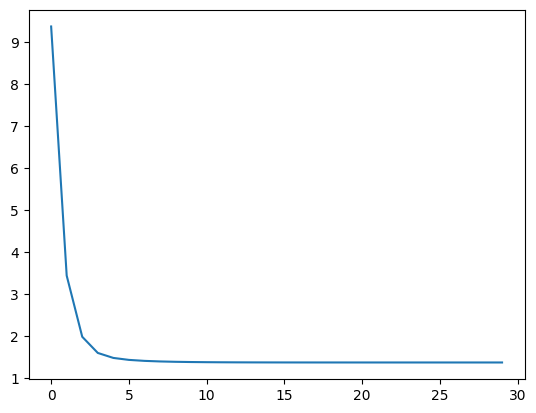

In [10]:
# Plot the loss per iteration
plt.plot(losses);

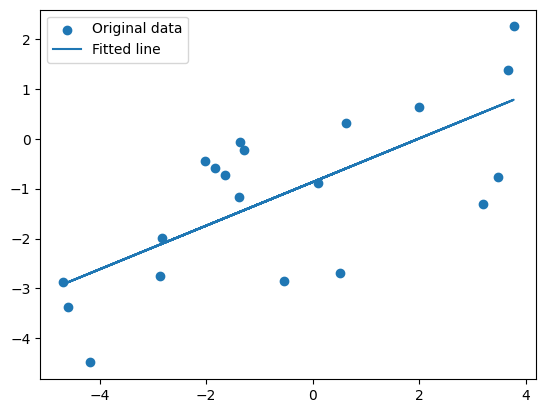

In [11]:
# Plot the graph
predicted = model(inputs).detach().numpy() 
# detach the tensor and then call the numpy function
# what if we don't detach? -> next cell
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [14]:
# Error! (What happens if we don't detach)
# model(inputs).numpy() <- run this code! It will produce an error
# Error message: Can't call numpy() on Tensor that requires grad. 
# Use tensor.detach().numpy() instead.

In [15]:
# Another way (Not to compute gradients)
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 0.73536986],
       [-2.1026552 ],
       [-0.6456988 ],
       [-1.4726217 ],
       [ 0.00549191],
       [-1.4681878 ],
       [-1.666193  ],
       [-1.751907  ],
       [-2.7003984 ],
       [-1.1068921 ],
       [-0.593959  ],
       [-2.118379  ],
       [-1.4292614 ],
       [ 0.7833412 ],
       [ 0.6526565 ],
       [-2.8762822 ],
       [ 0.5293054 ],
       [-1.5888143 ],
       [-2.9200876 ],
       [-0.82319933]], dtype=float32)

In [16]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because **we know the answer**
# TRue calues of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
# .numpy() brings the special PyTorch Tensor variable to a numpy land.
print(w, b)
# w is a 2D array and b is a 1D array (while both store single numbers)
# this gives flexibility (more on this later)

[[0.4373054]] [-0.8687603]
